In [6]:
import quandl
quandl.ApiConfig.api_key = ""
# Retrieve Apple Data 
apple = quandl.get('WIKI/AAPL')
# Retrieve Microsoft Data 
ms = quandl.get("WIKI/MSFT")

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [8]:
ms.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1986-03-13,25.50,29.25,25.5,28.00,3582600.0,0.0,1.0,0.058941,0.067609,0.058941,0.064720,1.031789e+09
1986-03-14,28.00,29.50,28.0,29.00,1070000.0,0.0,1.0,0.064720,0.068187,0.064720,0.067031,3.081600e+08
1986-03-17,29.00,29.75,29.0,29.50,462400.0,0.0,1.0,0.067031,0.068765,0.067031,0.068187,1.331712e+08
1986-03-18,29.50,29.75,28.5,28.75,235300.0,0.0,1.0,0.068187,0.068765,0.065876,0.066454,6.776640e+07
1986-03-19,28.75,29.00,28.0,28.25,166300.0,0.0,1.0,0.066454,0.067031,0.064720,0.065298,4.789440e+07


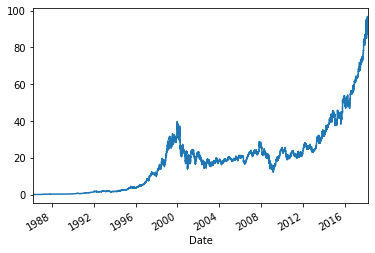

In [10]:
ms['Adj. Close'].plot();

In [11]:
ms.index

DatetimeIndex(['1986-03-13', '1986-03-14', '1986-03-17', '1986-03-18',
               '1986-03-19', '1986-03-20', '1986-03-21', '1986-03-24',
               '1986-03-25', '1986-03-26',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=8076, freq=None)

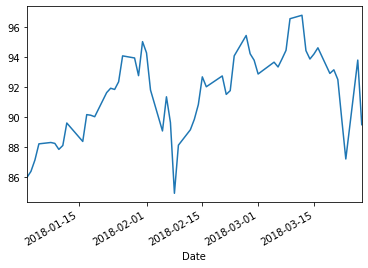

In [12]:
ms['2018']['Adj. Close'].plot();

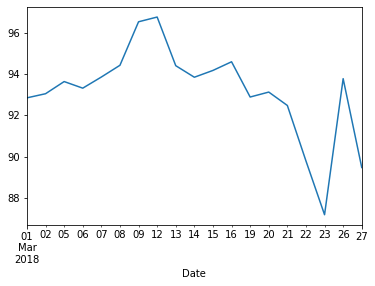

In [13]:
ms['2018-03']['Adj. Close'].plot();

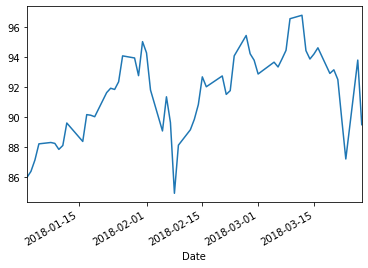

In [14]:
ms.loc['2018-01-01' : '2018-03-31']['Adj. Close'].plot()

In [15]:
apple.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [18]:
# Store price 
ms_price = ms[['Adj. Close']]
apple_price = apple[['Adj. Close']]

# Rename column
ms_price.rename(columns={'Adj. Close' : 'MSFT'}, inplace=True)
apple_price.rename(columns={'Adj. Close' : 'AAPL'}, inplace=True)

In [19]:
# Joining 
both_stokes = ms_price.join(apple_price, how='inner')

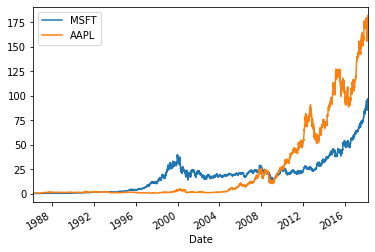

In [22]:
# Plot both apple and ms
both_stokes.plot();

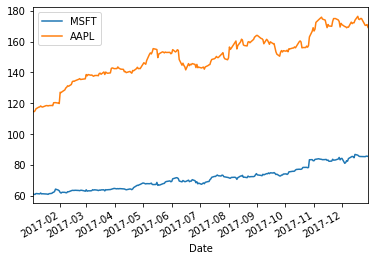

In [24]:
# Just 2017
both_stokes.loc['2017'].plot();

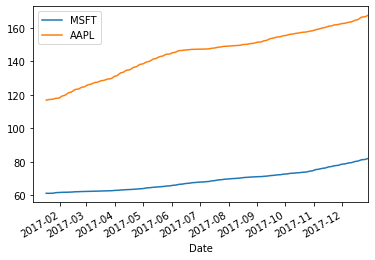

In [25]:
# Rolling <- mean
both_stokes.loc['2017'].rolling(min_periods = 10, window = 60, center=False).mean().plot();

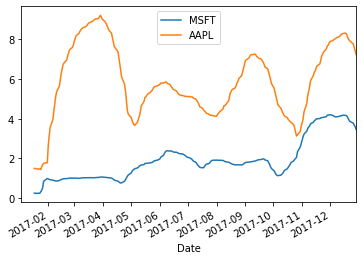

In [26]:
# Rolling <- std
both_stokes.loc['2017'].rolling(min_periods = 10, window = 60, center=False).std().plot();